DEEP LEARNING #101


Hand Written Digit Recognition with Basic Neural Network using Tensorflow & Keras.

Confusion Matrix as a Evaluation Metric

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train[0].shape

(28, 28)

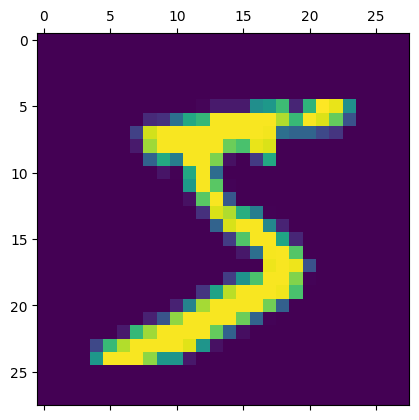

In [5]:
plt.matshow(X_train[0])

In [10]:
X_train = X_train / 255
X_test = X_test / 255   



In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

The flattening steps could be avoided , shown at the last step.

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1236 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9839


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0787 - accuracy: 0.9757


[0.07871408015489578, 0.9757000207901001]

In [27]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [28]:
y_predicted[0]

array([5.0856550e-03, 8.9518144e-04, 3.7191221e-01, 9.9276030e-01,
       5.8379661e-05, 3.2632232e-03, 1.6738573e-08, 9.9998152e-01,
       2.4176629e-01, 9.4857526e-01], dtype=float32)

In [29]:
np.argmax(y_predicted[0])

7

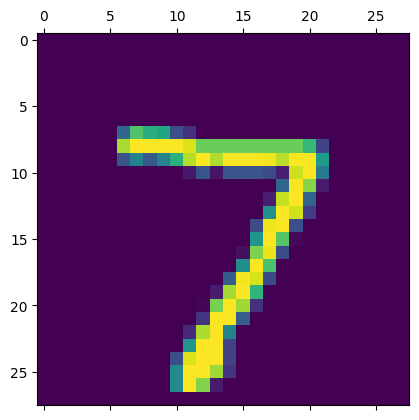

In [30]:
plt.matshow(X_test[0])

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    4,    0,    3,    6,    7,    1,    1,    1],
       [   0, 1126,    2,    1,    0,    1,    2,    0,    3,    0],
       [   2,    0, 1015,    2,    2,    0,    2,    3,    6,    0],
       [   0,    0,    3,  992,    0,    7,    0,    4,    2,    2],
       [   0,    0,    6,    0,  966,    1,    1,    0,    0,    8],
       [   1,    1,    0,    8,    1,  870,    5,    1,    2,    3],
       [   1,    3,    1,    1,    3,    4,  941,    0,    4,    0],
       [   0,    4,   12,    7,    2,    0,    0,  990,    1,   12],
       [   0,    0,    5,   11,    7,   16,    2,    2,  925,    6],
       [   0,    5,    0,    7,   14,    5,    1,    2,    0,  975]])>

Text(50.722222222222214, 0.5, 'Truth')

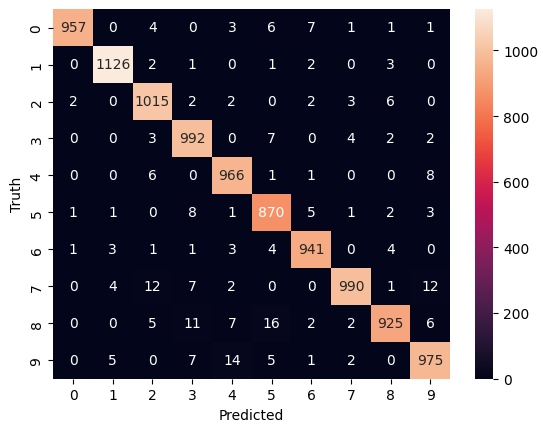

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2766 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1271 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9838
